In [1]:
from csoundengine.offline import OfflineEngine


In [2]:

e = OfflineEngine()

--Csound version 7.0 (double samples) Oct 28 2025
[commit: 15afda0ba81a895a4e87ac3ef5fe476702b072bf]
using libsndfile-1.2.2
sr = 44100.0, kr = 689.062, ksmps = 64
0dBFS level = 1.0, A4 tuning = 440.0
audio buffered in 256 sample-frame blocks
writing 1024-byte blks of shorts to /tmp/csoundengine-84kmqm5o.wav (WAV)
SECTION 1:


In [3]:
e.hasBusSupport()

False

In [7]:
foo = r'''
instr foo
  ibus = p4
  kfreq = busin:k(ibus)
  a0 oscili 0.1, kfreq
  outch 1, a0
endin
'''

This should raise an error, since the bus opcodes are not available

In [8]:
e.compile(foo)


In [6]:
e.addBusSupport()

Now this should be ok, since bus support was added

In [9]:
e.compile(foo)


In [10]:
bus = e.assignBus(value=1000)

In [11]:
e.sched('foo', 1, 2, bus)

'foo'

In [12]:
e.writeBus(bus, value=2000)

e.stop()

In [19]:

e = OfflineEngine(busSupport=True)

--Csound version 7.0 (double samples) Oct 28 2025
[commit: 15afda0ba81a895a4e87ac3ef5fe476702b072bf]
using libsndfile-1.2.2
sr = 44100.0, kr = 689.062, ksmps = 64
0dBFS level = 1.0, A4 tuning = 440.0
audio buffered in 256 sample-frame blocks
writing 1024-byte blks of shorts to /tmp/csoundengine-eo5i8yal.wav (WAV)
SECTION 1:


In [20]:
e.compile(r'''
instr foo
  ibus = p4
  kfreq = busin:k(ibus)
  a0 oscili 0.1, kfreq
  outch 1, a0
endin
''')

In [21]:
bus = e.assignBus(value=1000)
e.sched('foo', 1, 5, bus)

'foo'

In [22]:
e.writeBus(bus, value=2000, delay=2)
e.automateBus(bus, (3, 400, 3.5, 400, 4, 800))

41

resetting Csound instance
		   overall amps:  0.10000  0.00000
	   overall samples out of range:        0        0
0 errors in performance
512 1024 sample blks of shorts written to /tmp/csoundengine-eo5i8yal.wav (WAV)


RenderJob(outfile='/tmp/csoundengine-eo5i8yal.wav', samplerate=44100, encoding='float32', starttime=0.0, endtime=0.0, process=None)
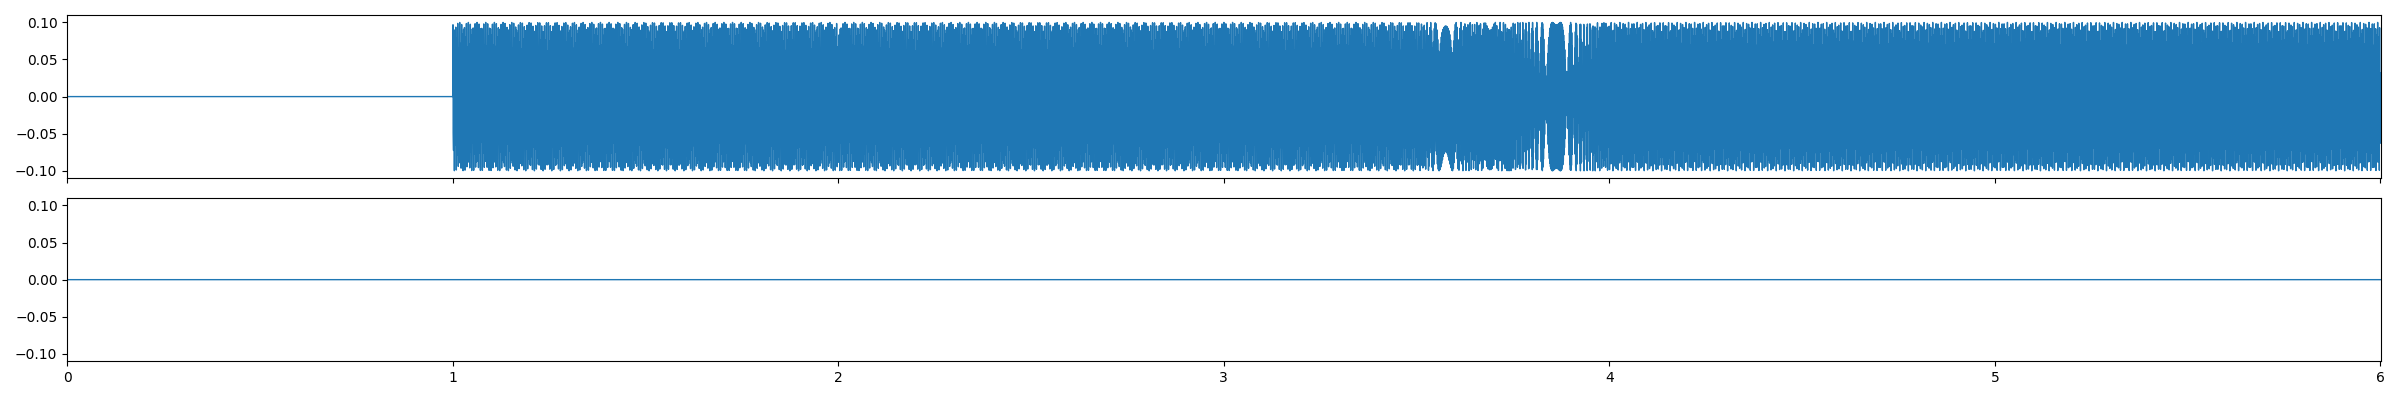

In [23]:
e.stop()